# MSPD



Monthly Statement of the Public Debt [MSPD] (https://fiscaldata.treasury.gov/static-data/MSPD_SumSecty_5_years.csv.zip) (USD)

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import datetime

In [3]:
%matplotlib inline

In [4]:
plt.rcParams['figure.figsize'] = (10, 5)

In [5]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

In [6]:
if os.path.isfile("MSPD_SumSecty_all_years.csv"):
    filepath = "MSPD_SumSecty_all_years.csv"
    print("loading from file")
else:
    filepath = "https://fiscaldata.treasury.gov/static-data/MSPD_SumSecty_5_years.csv.zip"
    print("loading from the internet")

df = pd.read_csv(filepath)
print("done")

loading from file
done


In [7]:
df.head(15)

,Record_Date,Security_Type_Description,Security_Class_Description,Debt_Held_by_the_PublicM,Intragovernmental_HoldingsM,Total_Public_Debt_OutstandingM,Source_Line_Number,Fiscal_Year,Fiscal_Quarter_Number,Calendar_Year,Calendar_Quarter_Number,Calendar_Month_Number,Calendar_Day_Number
0,31/05/2021,Marketable,Bills,4.375781e+06,1.296420e+03,4.377078e+06,1,2021,3,2021,2,5,31
1,31/05/2021,Marketable,Notes,1.182116e+07,9.198022e+03,1.183035e+07,2,2021,3,2021,2,5,31
2,31/05/2021,Marketable,Bonds,3.087149e+06,6.689686e+03,3.093839e+06,3,2021,3,2021,2,5,31
3,31/05/2021,Marketable,Treasury Inflation-Protected Securities,1.584621e+06,7.029200e+02,1.585324e+06,4,2021,3,2021,2,5,31
4,31/05/2021,Marketable,Floating Rate Notes,5.273868e+05,8.244500e+01,5.274693e+05,5,2021,3,2021,2,5,31
5,31/05/2021,Marketable,Federal Financing Bank,0.000000e+00,7.261857e+03,7.261857e+03,6,2021,3,2021,2,5,31
6,31/05/2021,Total Marketable,_,2.139610e+07,2.523135e+04,2.142133e+07,7,2021,3,2021,2,5,31
7,31/05/2021,Nonmarketable,Domestic Series,5.307535e+04,0.000000e+00,5.307535e+04,8,2021,3,2021,2,5,31
8,31/05/2021,Nonmarketable,Foreign Series,2.643420e+02,0.000000e+00,2.643420e+02,9,2021,3,2021,2,5,31
9,31/05/2021,Nonmarketable,State and Local Government Series,1.253390e+05,0.000000e+00,1.253390e+05,10,2021,3,2021,2,5,31


In [8]:
df.columns

Index(['Record_Date', 'Security_Type_Description',
       'Security_Class_Description', 'Debt_Held_by_the_PublicM',
       'Intragovernmental_HoldingsM', 'Total_Public_Debt_OutstandingM',
       'Source_Line_Number', 'Fiscal_Year', 'Fiscal_Quarter_Number',
       'Calendar_Year', 'Calendar_Quarter_Number', 'Calendar_Month_Number',
       'Calendar_Day_Number'],
      dtype='object')

In [9]:
row_one = df.iloc[1]
row_one
#row_two = marketbills_data.iloc[2]
#row_two
#row_three = marketnotes_data.iloc[3]
#row_four = marketbonds_data.iloc[4]
#row_five = markettreasury_data.iloc[5]
#row_six = marketfloating_data.iloc[6]
#row_seven = marketfed_data.iloc[7]
#row_eight = markettotal_data.iloc[8]
#row_nine = nonmarkdomestic_data[9]
#row_ten = nonmarkforeign_data.iloc[10]
#row_eleven = nonmarkstatelocal_data[11]
#row_twelve = nonmarkussavings_data[12]
#row_thirteen = nonmarkgov_data.iloc[13]
#row_fourteen = nonmarkother_data.iloc[14]
#row_fifteen = totalnonmark_data.iloc[15]
#row_sixteen = totalpublic_data.iloc[16]

Record_Date                        31/05/2021
Security_Type_Description          Marketable
Security_Class_Description              Notes
Debt_Held_by_the_PublicM          11821156.92
Intragovernmental_HoldingsM         9198.0221
Total_Public_Debt_OutstandingM    11830354.94
Source_Line_Number                          2
Fiscal_Year                              2021
Fiscal_Quarter_Number                       3
Calendar_Year                            2021
Calendar_Quarter_Number                     2
Calendar_Month_Number                       5
Calendar_Day_Number                        31
Name: 1, dtype: object

In [10]:
df['Record_Date']

0       31/05/2021
1       31/05/2021
2       31/05/2021
3       31/05/2021
4       31/05/2021
           ...    
3750    31/01/2001
3751    31/01/2001
3752    31/01/2001
3753    31/01/2001
3754    31/01/2001
Name: Record_Date, Length: 3755, dtype: object

In [11]:
df.shape #rows and Columns

(3755, 13)

In [12]:
df.info() #index, datatype and memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Record_Date                     3755 non-null   object 
 1   Security_Type_Description       3755 non-null   object 
 2   Security_Class_Description      3755 non-null   object 
 3   Debt_Held_by_the_PublicM        3755 non-null   float64
 4   Intragovernmental_HoldingsM     3755 non-null   float64
 5   Total_Public_Debt_OutstandingM  3755 non-null   float64
 6   Source_Line_Number              3755 non-null   int64  
 7   Fiscal_Year                     3755 non-null   int64  
 8   Fiscal_Quarter_Number           3755 non-null   int64  
 9   Calendar_Year                   3755 non-null   int64  
 10  Calendar_Quarter_Number         3755 non-null   int64  
 11  Calendar_Month_Number           3755 non-null   int64  
 12  Calendar_Day_Number             37

In [13]:
df.describe()

,Debt_Held_by_the_PublicM,Intragovernmental_HoldingsM,Total_Public_Debt_OutstandingM,Source_Line_Number,Fiscal_Year,Fiscal_Quarter_Number,Calendar_Year,Calendar_Quarter_Number,Calendar_Month_Number,Calendar_Day_Number
count,3.755000e+03,3.755000e+03,3.755000e+03,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000
mean,1.910304e+06,8.668278e+05,2.777132e+06,8.171771,2010.911052,2.498535,2010.666844,2.475366,6.422104,30.432224
std,3.851522e+06,1.817929e+06,4.646693e+06,4.430371,5.903691,1.108492,5.896420,1.119935,3.459714,0.824424
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,2001.000000,1.000000,2001.000000,1.000000,1.000000,28.000000
25%,2.547311e+04,0.000000e+00,2.999518e+04,4.000000,2006.000000,2.000000,2006.000000,1.000000,3.000000,30.000000
50%,2.044653e+05,3.095710e+02,4.942945e+05,8.000000,2011.000000,2.000000,2011.000000,2.000000,6.000000,31.000000
75%,1.505202e+06,1.550016e+04,4.030926e+06,12.000000,2016.000000,3.000000,2016.000000,3.000000,9.000000,31.000000
max,2.205606e+07,6.178069e+06,2.819901e+07,16.000000,2021.000000,4.000000,2021.000000,4.000000,12.000000,31.000000


In [14]:
df.iloc[0,2]

'Bills'

In [15]:
df.sort_values(['Record_Date'], ascending=False)

,Record_Date,Security_Type_Description,Security_Class_Description,Debt_Held_by_the_PublicM,Intragovernmental_HoldingsM,Total_Public_Debt_OutstandingM,Source_Line_Number,Fiscal_Year,Fiscal_Quarter_Number,Calendar_Year,Calendar_Quarter_Number,Calendar_Month_Number,Calendar_Day_Number
88,31/12/2020,Total Nonmarketable,_,6.738964e+05,6.093510e+06,6.767407e+06,14,2021,1,2020,4,12,31
82,31/12/2020,Nonmarketable,Domestic Series,1.111121e+05,0.000000e+00,1.111121e+05,8,2021,1,2020,4,12,31
76,31/12/2020,Marketable,Notes,1.108474e+07,7.180354e+03,1.109192e+07,2,2021,1,2020,4,12,31
75,31/12/2020,Marketable,Bills,4.963056e+06,1.083746e+03,4.964140e+06,1,2021,1,2020,4,12,31
89,31/12/2020,Total Public Debt Outstanding,_,2.163242e+07,6.115379e+06,2.774780e+07,15,2021,1,2020,4,12,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3726,28/02/2001,Marketable,Inflation-Indexed Notes,8.826699e+04,0.000000e+00,8.826699e+04,4,2001,2,2001,1,2,28
3725,28/02/2001,Marketable,Bonds,6.310244e+05,4.593210e+02,6.314827e+05,3,2001,2,2001,1,2,28
3724,28/02/2001,Marketable,Notes,1.534890e+06,1.000000e+00,1.534891e+06,2,2001,2,2001,1,2,28
3723,28/02/2001,Marketable,Bills,6.806587e+05,0.000000e+00,6.806587e+05,1,2001,2,2001,1,2,28


In [16]:
df.groupby(['Source_Line_Number'])

In [17]:
df = pd.read_csv("MSPD_SumSecty_all_years.csv", parse_dates=['Record_Date'], dayfirst=True)
 #convert the date column to a time scale, in the DD/MM/YYYY format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Record_Date                     3755 non-null   datetime64[ns]
 1   Security_Type_Description       3755 non-null   object        
 2   Security_Class_Description      3755 non-null   object        
 3   Debt_Held_by_the_PublicM        3755 non-null   float64       
 4   Intragovernmental_HoldingsM     3755 non-null   float64       
 5   Total_Public_Debt_OutstandingM  3755 non-null   float64       
 6   Source_Line_Number              3755 non-null   int64         
 7   Fiscal_Year                     3755 non-null   int64         
 8   Fiscal_Quarter_Number           3755 non-null   int64         
 9   Calendar_Year                   3755 non-null   int64         
 10  Calendar_Quarter_Number         3755 non-null   int64         
 11  Cale

In [18]:
df["Record_Date"].min(), df["Record_Date"].max() #checking dataframe


(Timestamp('2001-01-31 00:00:00'), Timestamp('2021-05-31 00:00:00'))

In [19]:
df["Record_Date"].max() - df["Record_Date"].min() #checking timescale

Timedelta('7425 days 00:00:00')

In [20]:
dti = pd.to_datetime(["31/01/2001", np.datetime64('2001-01-31'), datetime.datetime(2001, 1, 31)])
dti
start = df["Record_Date"].min()
end = df["Record_Date"].max() # creating date time index

In [21]:
rng = pd.date_range(start = df["Record_Date"].min(), end = df["Record_Date"].max(), freq='M') #date range in months

TPDO = df.loc[df["Source_Line_Number"] == 7, "Total_Public_Debt_OutstandingM"] #locate each "Source Line 7" cell which is "Total Marketable Debt" and the Number in the "Total Public Debt Outstanding" = Total Public Marketable Debt per quarter sourced

ts = pd.Series((TPDO), index=rng) #Create an index timescale of each quarter, based on the range of dates available at the min and max

pd.options.display.float_format = '{:.0f}'.format #reformat the display of numbers to get solid, non decimal displays

In [22]:
TPDO #viewing TPDO in 

6      21421327
21     21456854
36     21388100
51     21158520
66     21048965
         ...   
3681    2855417
3697    2877872
3713    3017869
3729    2989258
3745    2977328
Name: Total_Public_Debt_OutstandingM, Length: 245, dtype: float64

In [23]:
TPDO.min()
TPDO.max()
rngTPDO =  TPDO.max() - TPDO.min()

In [24]:
ts

2001-01-31   NaN
2001-02-28   NaN
2001-03-31   NaN
2001-04-30   NaN
2001-05-31   NaN
              ..
2021-01-31   NaN
2021-02-28   NaN
2021-03-31   NaN
2021-04-30   NaN
2021-05-31   NaN
Freq: M, Name: Total_Public_Debt_OutstandingM, Length: 245, dtype: float64

In [25]:
rng

DatetimeIndex(['2001-01-31', '2001-02-28', '2001-03-31', '2001-04-30',
               '2001-05-31', '2001-06-30', '2001-07-31', '2001-08-31',
               '2001-09-30', '2001-10-31',
               ...
               '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30',
               '2020-12-31', '2021-01-31', '2021-02-28', '2021-03-31',
               '2021-04-30', '2021-05-31'],
              dtype='datetime64[ns]', length=245, freq='M')

In [26]:
dti

DatetimeIndex(['2001-01-31', '2001-01-31', '2001-01-31'], dtype='datetime64[ns]', freq=None)

In [27]:
debt_df = pd.read_csv("MSPD_SumSecty_all_years.csv", parse_dates=['Record_Date'], dayfirst=True) #index dates
debt_three = debt_df[['Record_Date', 'Security_Type_Description', 'Total_Public_Debt_OutstandingM']] #select 3 columns
select_marketable = debt_three.loc[debt_three['Security_Type_Description']=='Total Marketable'] #select the rows that contain 'Total Marketable'
select_marketable

,Record_Date,Security_Type_Description,Total_Public_Debt_OutstandingM
6,2021-05-31,Total Marketable,21421327
21,2021-04-30,Total Marketable,21456854
36,2021-03-31,Total Marketable,21388100
51,2021-02-28,Total Marketable,21158520
66,2021-01-31,Total Marketable,21048965
...,...,...,...
3681,2001-05-31,Total Marketable,2855417
3697,2001-04-30,Total Marketable,2877872
3713,2001-03-31,Total Marketable,3017869
3729,2001-02-28,Total Marketable,2989258


In [28]:
debt_three.head(10)

,Record_Date,Security_Type_Description,Total_Public_Debt_OutstandingM
0,2021-05-31,Marketable,4377078
1,2021-05-31,Marketable,11830355
2,2021-05-31,Marketable,3093839
3,2021-05-31,Marketable,1585324
4,2021-05-31,Marketable,527469
5,2021-05-31,Marketable,7262
6,2021-05-31,Total Marketable,21421327
7,2021-05-31,Nonmarketable,53075
8,2021-05-31,Nonmarketable,264
9,2021-05-31,Nonmarketable,125339


Text(0.5, 1.0, 'Total Public Debt Outstanding in Millions per Quarter')

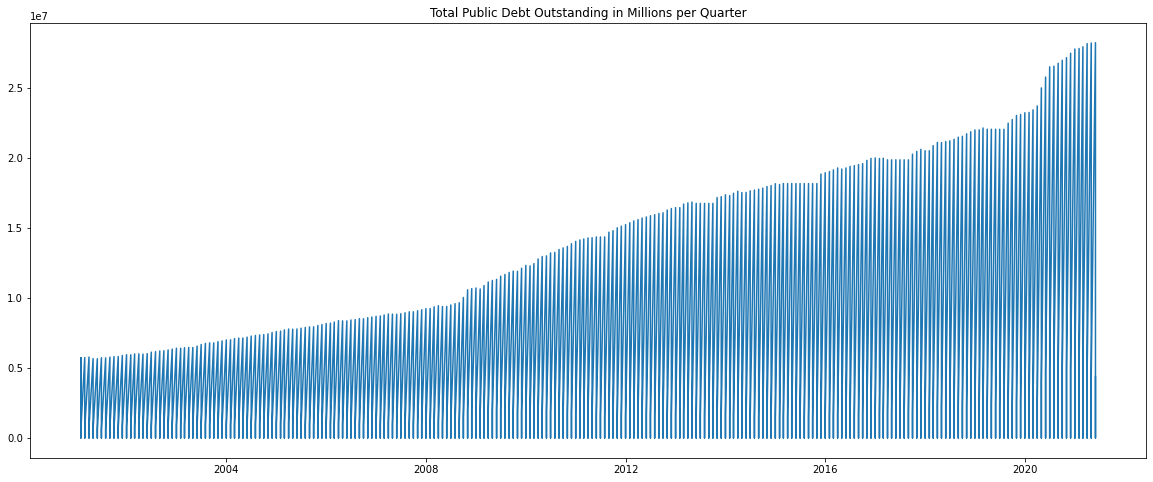

In [29]:
x = debt_three['Record_Date']
y = debt_three['Total_Public_Debt_OutstandingM']
fig, ax = plt.subplots(figsize = (20, 8))
ax.plot(x, y)
ax.set_title('Total Public Debt Outstanding in Millions per Quarter')
#graph created using the debt 3 df, 

Text(0.5, 1.0, 'Total Public Debt Outstanding in Millions per Quarter')

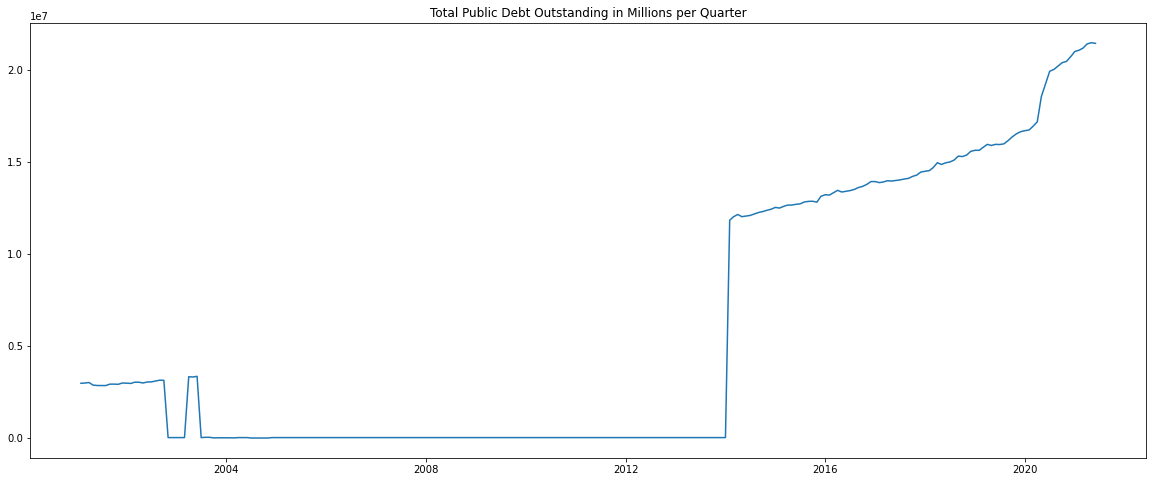

In [30]:
x = rng #beggining of recorded data to current, taken from record date column
y = TPDO[::-1] #reversed data information to match the rng index
fig, ax = plt.subplots(figsize = (20, 8))
ax.plot(x, y)
ax.set_title('Total Public Debt Outstanding in Millions per Quarter')

#final graph messed up due to data inconsistently having data at either 15 or 16 intervals


Text(2009-04-02, 20, 'Hello')

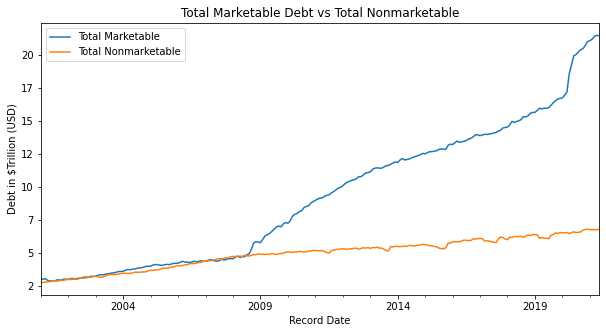

In [31]:
ax = debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Type_Description"] == "Total Marketable"].Total_Public_Debt_OutstandingM.plot(label="Total Marketable")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")["Security_Type_Description"]
                                 == "Total Nonmarketable"].Total_Public_Debt_OutstandingM.plot(label="Total Nonmarketable")

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ',')))
plt.ylabel("Debt in $Trillion (USD)")
plt.title("Total Marketable Debt vs Total Nonmarketable")
plt.xlabel("Record Date")

plt.legend()

plt.annotate("Hello", ("2009-04-02", 20))

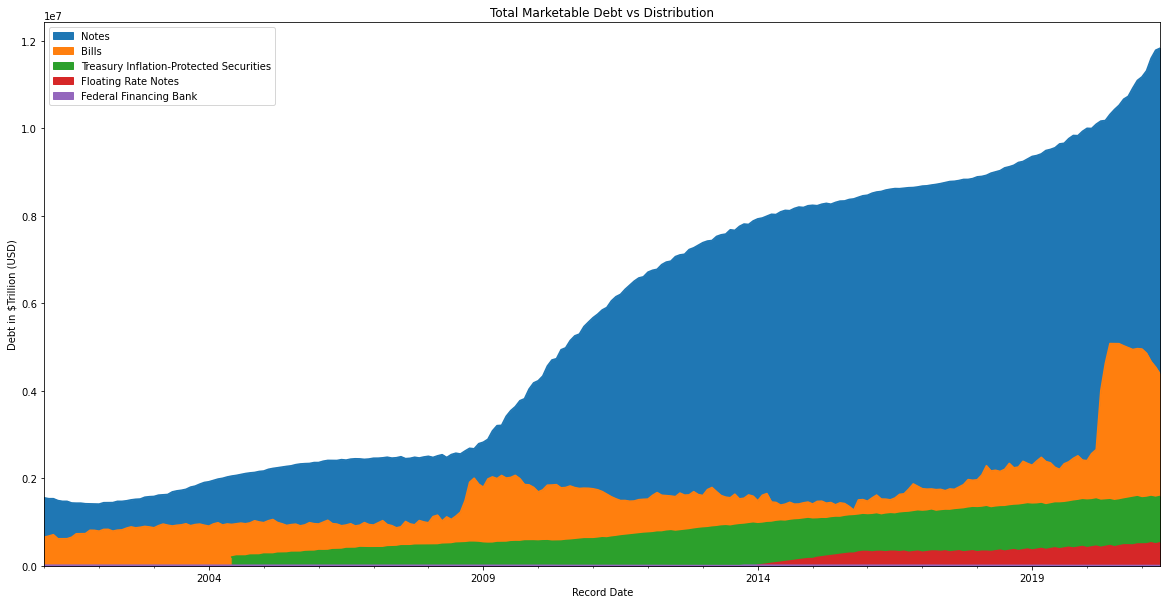

In [62]:

#Total Marketable Graph

#Total Marketable Debt
# ax = debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
#     "Security_Type_Description"] == "Total Marketable"].Total_Public_Debt_OutstandingM.plot(label="Total Marketable")


#Class Descriptions
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Notes"].Total_Public_Debt_OutstandingM.plot.area(label="Notes")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Bills"].Total_Public_Debt_OutstandingM.plot.area(label="Bills")   
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Treasury Inflation-Protected Securities"].Total_Public_Debt_OutstandingM.plot.area(label="Treasury Inflation-Protected Securities")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Floating Rate Notes"].Total_Public_Debt_OutstandingM.plot.area(label="Floating Rate Notes")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Federal Financing Bank"].Total_Public_Debt_OutstandingM.plot.area(label="Federal Financing Bank")



#Labels    
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ',')))
plt.ylabel("Debt in $Trillion (USD)")
plt.title("Total Marketable Debt vs Distribution")
plt.xlabel("Record Date")


plt.legend()    

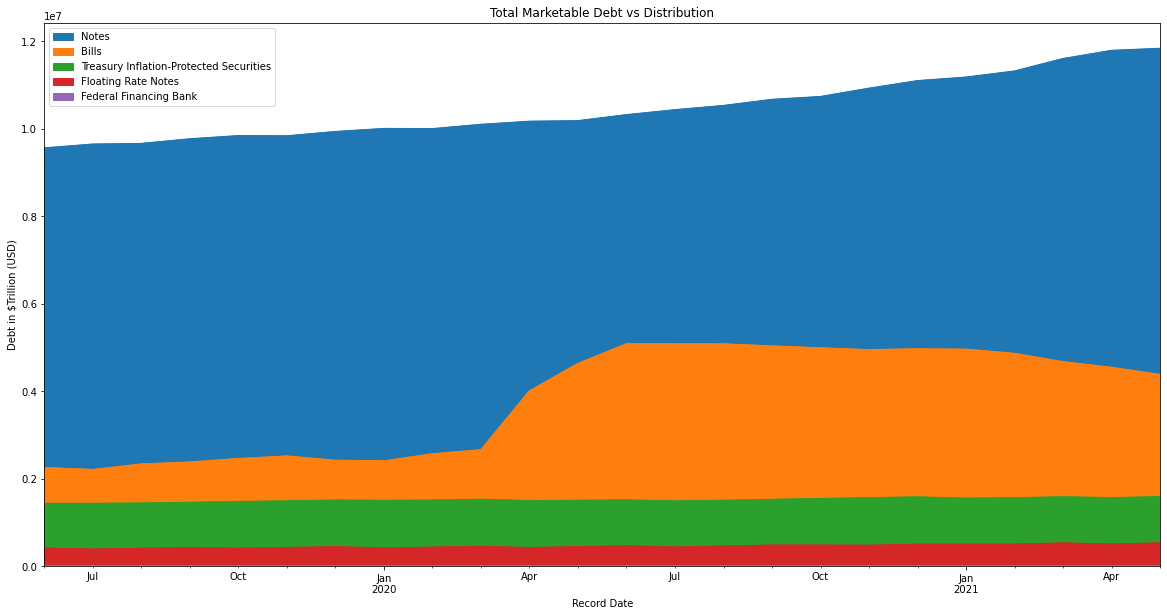

In [67]:
#Total Marketable Graph

#Total Marketable Debt
# ax = debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
#     "Security_Type_Description"] == "Total Marketable"].Total_Public_Debt_OutstandingM.plot(label="Total Marketable")


#Class Descriptions
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Notes"].Total_Public_Debt_OutstandingM.plot.area(label="Notes")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Bills"].Total_Public_Debt_OutstandingM.plot.area(label="Bills")   
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Treasury Inflation-Protected Securities"].Total_Public_Debt_OutstandingM.plot.area(label="Treasury Inflation-Protected Securities")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Floating Rate Notes"].Total_Public_Debt_OutstandingM.plot.area(label="Floating Rate Notes")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Federal Financing Bank"].Total_Public_Debt_OutstandingM.plot.area(label="Federal Financing Bank")



#Labels    
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ',')))
plt.ylabel("Debt in $Trillion (USD)")
plt.title("Total Marketable Debt vs Distribution")
plt.xlabel("Record Date")
plt.xlim("2019-06-01", "2021-05-31")


plt.legend() 

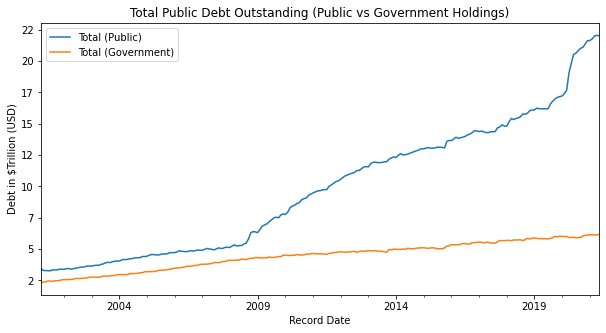

In [33]:
#Total Public Debt Outstanding

ax = debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Type_Description"] == "Total Public Debt Outstanding"].Debt_Held_by_the_PublicM.plot(label="Total (Public)")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Type_Description"] == "Total Public Debt Outstanding"].Intragovernmental_HoldingsM.plot(label="Total (Government)")


ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ',')))
plt.ylabel("Debt in $Trillion (USD)")
plt.title("Total Public Debt Outstanding (Public vs Government Holdings)")
plt.xlabel("Record Date")

plt.legend()   

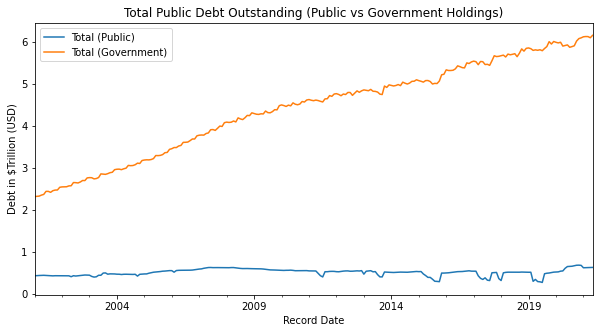

In [34]:
ax = debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Type_Description"] == "Total Nonmarketable"].Debt_Held_by_the_PublicM.plot(label="Total (Public)")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Type_Description"] == "Total Nonmarketable"].Intragovernmental_HoldingsM.plot(label="Total (Government)")

ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ',')))
plt.ylabel("Debt in $Trillion (USD)")
plt.title("Total Nonmarketable Debt (Public vs Government Holdings)")
plt.xlabel("Record Date")

plt.legend()

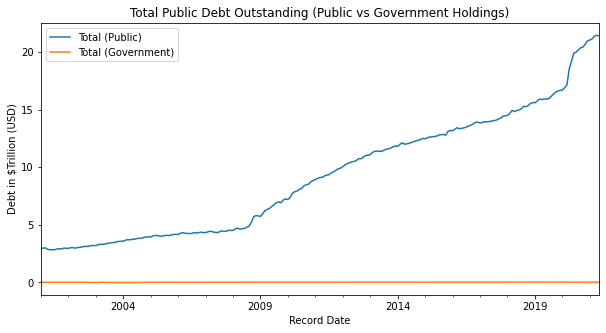

In [35]:
ax = debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Type_Description"] == "Total Marketable"].Debt_Held_by_the_PublicM.plot(label="Total (Public)")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Type_Description"] == "Total Marketable"].Intragovernmental_HoldingsM.plot(label="Total (Government)")

ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ',')))
plt.ylabel("Debt in $Trillion (USD)")
plt.title("Total Marketable (Public vs Government Holdings)")
plt.xlabel("Record Date")

plt.legend()

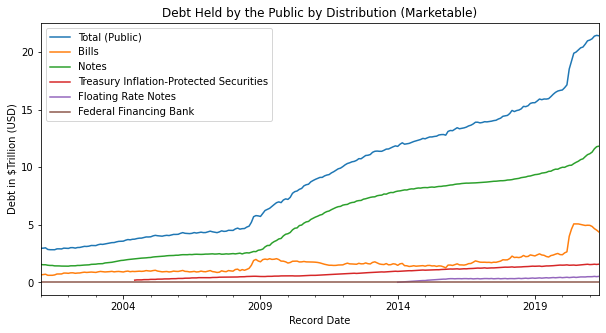

In [36]:

#Debt Held by the Public Graph
ax = debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Type_Description"] == "Total Marketable"].Debt_Held_by_the_PublicM.plot(label="Total (Public)")

#Class Descriptions    
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Bills"].Debt_Held_by_the_PublicM.plot(label="Bills")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Notes"].Debt_Held_by_the_PublicM.plot(label="Notes")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Treasury Inflation-Protected Securities"].Debt_Held_by_the_PublicM.plot(label="Treasury Inflation-Protected Securities")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Floating Rate Notes"].Debt_Held_by_the_PublicM.plot(label="Floating Rate Notes")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Federal Financing Bank"].Debt_Held_by_the_PublicM.plot(label="Federal Financing Bank")



ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ',')))
plt.ylabel("Debt in $Trillion (USD)")
plt.title("Debt Held by the Public by Distribution (Marketable)")
plt.xlabel("Record Date")

plt.legend()

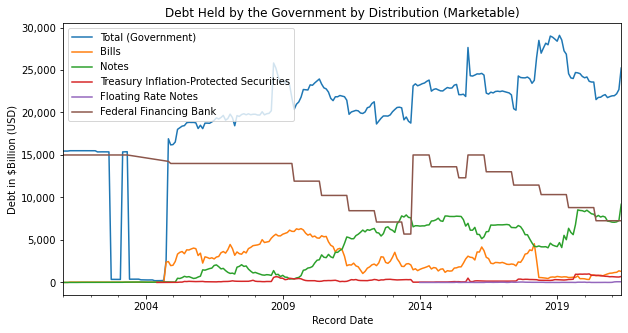

In [37]:
#Debt Held by the Government Graph
ax = debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Type_Description"] == "Total Marketable"].Intragovernmental_HoldingsM.plot(label="Total (Government)")

#Class Descriptions    
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Bills"].Intragovernmental_HoldingsM.plot(label="Bills")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Notes"].Intragovernmental_HoldingsM.plot(label="Notes")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Treasury Inflation-Protected Securities"].Intragovernmental_HoldingsM.plot(label="Treasury Inflation-Protected Securities")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Floating Rate Notes"].Intragovernmental_HoldingsM.plot(label="Floating Rate Notes")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Federal Financing Bank"].Intragovernmental_HoldingsM.plot(label="Federal Financing Bank")


#Labels
plt.rcParams['figure.figsize'] = (20,10)
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylabel("Debt in $Billion (USD)")
plt.title("Debt Held by the Government by Distribution (Marketable)")
plt.xlabel("Record Date")
plt.xlim("2019-06-01", "2021-05-31")

plt.legend()


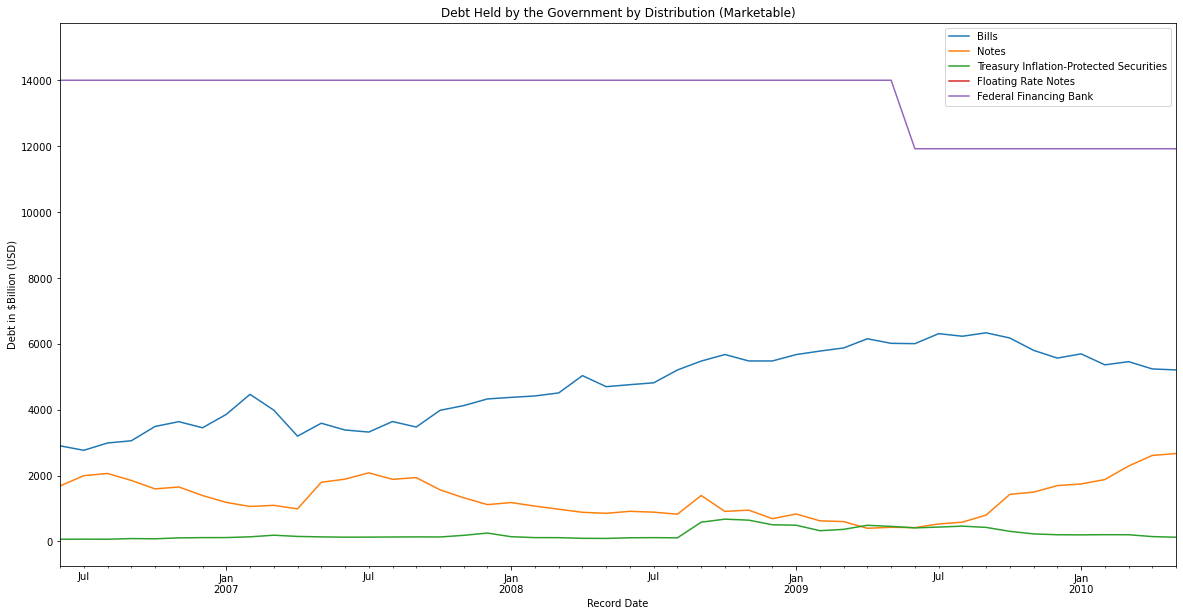

In [73]:
#Debt Held by the Government Graph
# ax = debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
#     "Security_Type_Description"] == "Total Marketable"].Intragovernmental_HoldingsM.plot(label="Total (Government)")

#Class Descriptions    
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Bills"].Intragovernmental_HoldingsM.plot(label="Bills")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Notes"].Intragovernmental_HoldingsM.plot(label="Notes")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Treasury Inflation-Protected Securities"].Intragovernmental_HoldingsM.plot(label="Treasury Inflation-Protected Securities")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Floating Rate Notes"].Intragovernmental_HoldingsM.plot(label="Floating Rate Notes")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Federal Financing Bank"].Intragovernmental_HoldingsM.plot(label="Federal Financing Bank")


#Labels
plt.rcParams['figure.figsize'] = (20,10)
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylabel("Debt in $Billion (USD)")
plt.title("Debt Held by the Government by Distribution (Marketable)")
plt.xlabel("Record Date")
plt.xlim("2006-06-01", "2010-05-31")

plt.legend()

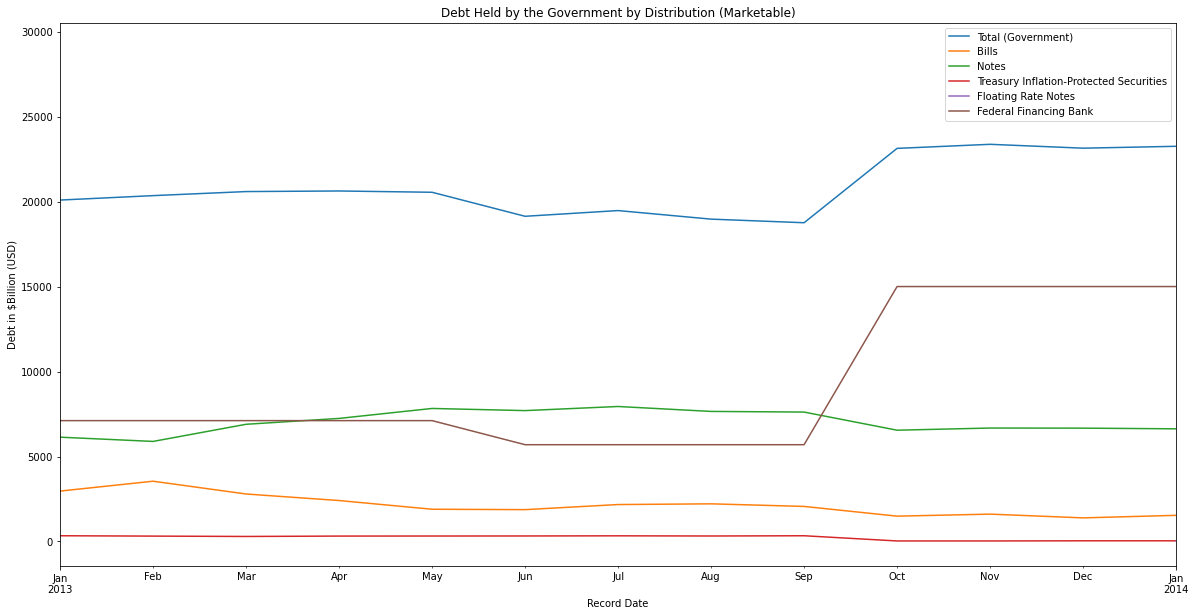

In [72]:
#Debt Held by the Government Graph
ax = debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Type_Description"] == "Total Marketable"].Intragovernmental_HoldingsM.plot(label="Total (Government)")

#Class Descriptions    
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Bills"].Intragovernmental_HoldingsM.plot(label="Bills")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Notes"].Intragovernmental_HoldingsM.plot(label="Notes")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Treasury Inflation-Protected Securities"].Intragovernmental_HoldingsM.plot(label="Treasury Inflation-Protected Securities")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Floating Rate Notes"].Intragovernmental_HoldingsM.plot(label="Floating Rate Notes")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Federal Financing Bank"].Intragovernmental_HoldingsM.plot(label="Federal Financing Bank")


#Labels
plt.rcParams['figure.figsize'] = (20,10)
# ax.get_yaxis().set_major_formatter(
# matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylabel("Debt in $Billion (USD)")
plt.title("Debt Held by the Government by Distribution (Marketable)")
plt.xlabel("Record Date")
plt.xlim("2013-01-01", "2014-01-01")

plt.legend()